# Anti Money Laundering

<img src="https://raw.githubusercontent.com/katonic-dev/Katonic-ML-Marketplace/master/Anti-Money%20Laundering%20Activity%20Scoring/money_laundering-img.jpg?token=AQS2G3LGU2Z2XJDX6LCZNMTBZ3RTC" style="width: 1000px;"/>

## Introduction
With its ability to dynamically learn patterns in complex data, AI will significantly improve accuracy in predicting which cases will result in a SAR filing. AI models for anti-money laundering can be deployed into the review process to score and rank all new cases. Any case that exceeds a predetermined threshold of risk is sent to the investigators for manual review. Meanwhile, any case that falls below the threshold can be automatically discarded or sent to a lighter review. Once AI models are deployed into production, they can be continuously retrained on new data to capture any novel behaviors of money laundering. This data will come from the feedback investigators

In general, AI helps investigators focus their attention on cases that have the highest risk of AML while minimizing the time they spend reviewing false-positive cases. For banks with large volumes of daily transactions, improvements in the effectiveness and efficiency of their investigations ultimately results in fewer cases of money laundering that go unnoticed. This allows banks to enhance their regulatory compliance and reduce the volume of financial crime present within their network.

## Data Preparation

In this section we explore the structure of our data:

1. To understand the input space of the data set
2. And to prepare the sets for exploratory and prediction tasks as described in above

## Import Libraries

In [2]:
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
# For data wrangling 
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [5]:
data_path = 'money_laudering_data.csv'
df = pd.read_csv(data_path , delimiter=',')
df.head()

,ALERT,SAR,kycRiskScore,income,tenureMonths,creditScore,state,nbrPurchases90d,avgTxnSize90d,totalSpend90d,csrNotes,nbrDistinctMerch90d,nbrMerchCredits90d,nbrMerchCreditsRndDollarAmt90d,totalMerchCred90d,nbrMerchCreditsWoOffsettingPurch,nbrPayments90d,totalPaymentAmt90d,overpaymentAmt90d,overpaymentInd90d,nbrCustReqRefunds90d,indCustReqRefund90d,totalRefundsToCust90d,nbrPaymentsCashLike90d,maxRevolveLine,indOwnsHome,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,nbrPointRed90d,PEP
0,1,0,3,110300.0,5,757,PA,10,153.80,1538.00,,7,2,0,308.98,0,5,76.90,0.00,0,1,1,45.82,5,6000,0,3,0,6,1,0
1,1,0,2,107800.0,6,715,NY,22,1.59,34.98,card replace billing address billing address,11,2,0,3.28,1,4,60.00,25.02,1,2,1,67.40,0,10000,1,3,0,87,0,0
2,1,0,1,74000.0,13,751,MA,7,57.64,403.48,billing address customer call,4,0,0,0.00,0,4,796.63,393.15,1,2,1,450.69,0,10000,0,3,0,6,0,0
3,1,0,0,57700.0,1,659,NJ,14,29.52,413.28,,7,2,0,59.14,1,3,413.28,0.00,0,1,1,71.43,0,8000,1,5,0,7,2,0
4,1,0,1,59800.0,3,709,PA,54,115.77,6251.58,change request statement late payment bitcoin,16,7,2,785.85,2,3,8928.41,2676.83,1,2,1,2731.39,3,7000,1,1,0,8,1,0


The dataframe contains 10000 rows and 31 columns

In [6]:
# check which columns contain NaN values
df.isna().sum()

ALERT                                 0
SAR                                   0
kycRiskScore                          0
income                              200
tenureMonths                          0
creditScore                           0
state                                 0
nbrPurchases90d                       0
avgTxnSize90d                         0
totalSpend90d                         0
csrNotes                              0
nbrDistinctMerch90d                   0
nbrMerchCredits90d                    0
nbrMerchCreditsRndDollarAmt90d        0
totalMerchCred90d                     0
nbrMerchCreditsWoOffsettingPurch      0
nbrPayments90d                        0
totalPaymentAmt90d                    0
overpaymentAmt90d                     0
overpaymentInd90d                     0
nbrCustReqRefunds90d                  0
indCustReqRefund90d                   0
totalRefundsToCust90d                 0
nbrPaymentsCashLike90d                0
maxRevolveLine                        0


The column `income` contains 200 NaN values

In [7]:
# Handling missing values
df = df[df["income"].isna()]

In [8]:
# Correlation Matrix
corr = df.corr()
corr

,ALERT,SAR,kycRiskScore,income,tenureMonths,creditScore,nbrPurchases90d,avgTxnSize90d,totalSpend90d,nbrDistinctMerch90d,nbrMerchCredits90d,nbrMerchCreditsRndDollarAmt90d,totalMerchCred90d,nbrMerchCreditsWoOffsettingPurch,nbrPayments90d,totalPaymentAmt90d,overpaymentAmt90d,overpaymentInd90d,nbrCustReqRefunds90d,indCustReqRefund90d,totalRefundsToCust90d,nbrPaymentsCashLike90d,maxRevolveLine,indOwnsHome,nbrInquiries1y,nbrCollections3y,nbrWebLogins90d,nbrPointRed90d,PEP
ALERT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAR,NaN,1.000000e+00,-0.035922,NaN,-0.042177,-0.123187,0.282779,0.177028,0.555082,0.286992,0.341874,0.268440,0.545702,0.242233,-1.821830e-17,0.449055,0.048490,0.064866,0.215431,NaN,0.047945,0.242469,0.019127,-0.041005,0.036479,-0.026129,0.051022,-0.023736,NaN
kycRiskScore,NaN,-3.592176e-02,1.000000,NaN,0.146078,0.040689,-0.050750,0.020942,-0.007753,-0.053237,-0.053693,0.001537,-0.024527,-0.013547,1.309546e-02,-0.007195,0.027133,-0.018539,0.060185,NaN,0.026920,0.042513,-0.053687,-0.074256,-0.014370,0.008998,0.008036,0.066838,NaN
income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenureMonths,NaN,-4.217748e-02,0.146078,NaN,1.000000,-0.025988,-0.119936,0.069867,0.045818,-0.127943,-0.101425,-0.061499,0.079116,-0.068778,-1.427747e-01,0.090687,0.095424,-0.005749,-0.024381,NaN,0.093825,-0.054811,-0.062726,0.072487,-0.044389,0.009843,-0.020972,0.120075,NaN
creditScore,NaN,-1.231869e-01,0.040689,NaN,-0.025988,1.000000,-0.038691,0.078492,-0.105673,-0.048987,-0.067084,-0.034713,-0.118418,-0.003839,5.005995e-02,-0.023865,0.049344,0.055587,-0.007998,NaN,0.048513,-0.024393,-0.011007,-0.101829,0.070529,-0.177898,0.105729,0.060849,NaN
nbrPurchases90d,NaN,2.827791e-01,-0.050750,NaN,-0.119936,-0.038691,1.000000,-0.089321,0.539579,0.987802,0.900016,0.793119,0.438875,0.845813,-4.499693e-02,0.399061,0.039396,-0.099453,-0.047616,NaN,0.039530,0.300711,0.104664,-0.037679,0.111617,0.106507,0.061980,0.189828,NaN
avgTxnSize90d,NaN,1.770276e-01,0.020942,NaN,0.069867,0.078492,-0.089321,1.000000,0.444794,-0.080098,-0.057417,-0.038771,0.314325,-0.058829,2.534648e-02,0.485478,0.279979,-0.142744,0.050374,NaN,0.280716,0.185583,-0.116108,-0.005066,-0.003001,0.064774,0.059766,-0.118104,NaN
totalSpend90d,NaN,5.550825e-01,-0.007753,NaN,0.045818,-0.105673,0.539579,0.444794,1.000000,0.542390,0.581751,0.522944,0.897176,0.468632,-3.487382e-02,0.830131,0.174970,-0.216825,-0.080274,NaN,0.177027,0.426003,0.049259,0.052208,0.048041,0.002825,0.107919,0.025875,NaN
nbrDistinctMerch90d,NaN,2.869915e-01,-0.053237,NaN,-0.127943,-0.048987,0.987802,-0.080098,0.542390,1.000000,0.878415,0.771854,0.428917,0.824268,-4.985395e-02,0.393084,0.026456,-0.107989,-0.050654,NaN,0.026559,0.289224,0.121720,-0.045545,0.101694,0.089928,0.056094,0.186772,NaN


In [9]:
# Checking Data Types
df.dtypes

ALERT                                 int64
SAR                                   int64
kycRiskScore                          int64
income                              float64
tenureMonths                          int64
creditScore                           int64
state                                object
nbrPurchases90d                       int64
avgTxnSize90d                       float64
totalSpend90d                       float64
csrNotes                             object
nbrDistinctMerch90d                   int64
nbrMerchCredits90d                    int64
nbrMerchCreditsRndDollarAmt90d        int64
totalMerchCred90d                   float64
nbrMerchCreditsWoOffsettingPurch      int64
nbrPayments90d                        int64
totalPaymentAmt90d                  float64
overpaymentAmt90d                   float64
overpaymentInd90d                     int64
nbrCustReqRefunds90d                  int64
indCustReqRefund90d                   int64
totalRefundsToCust90d           

In [10]:
df1 = df.groupby("state").agg({'totalMerchCred90d': 'mean'})
fig = px.bar(df1)
fig.update_layout(
    uniformtext_minsize=8, uniformtext_mode='hide',
    title="Total Merchant Credits by State (90 days)",
    xaxis_title="Total Merchant Credits (90 days)",
    yaxis_title="State",
)
fig.show()

In [11]:
df1 = df.where(df['SAR'] == 1).groupby('state').agg({'SAR': 'count'})
df2 = df.where(df['SAR'] == 0).groupby('state').agg({'SAR': 'count'})
df_perc = (df1/(df2+df1))
fig = px.bar(df_perc)
fig.update_layout(
    uniformtext_minsize=8, uniformtext_mode='hide',
    title="Suspicious Activity by state",
    xaxis_title="State",
    yaxis_title="Suspicious Activity",
)
fig.show()

## Model fitting and selection

In [12]:
X = df.drop(['SAR'], axis = 1)
Y = df['SAR']

In [13]:
import evalml
from evalml.automl import AutoMLSearch
problem_type = 'binary'

X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, Y, problem_type = problem_type, test_size=.2)

# perform a search across multiple pipelines and hyperparameters
automl = AutoMLSearch(X_train, y_train, problem_type=problem_type)
automl.search()

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Mode Baseline Binary Classification Pipeline may not perform as estimated on unseen data.
	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Classifier w/ Label Encoder + Drop Null Columns Transformer + Drop Columns Transformer + Imputer + One Hot Encoder + Oversampler may not perform as estimated on unseen data.


In [14]:
# the best pipeline is already refitted on the entire training data
best_pipeline = automl.best_pipeline
best_pipeline.predict(X_test)

6139    0
9210    0
5153    0
7874    0
4457    0
4692    0
3847    0
2476    0
3335    0
2590    0
7851    0
1688    0
1123    0
2365    0
4197    0
4442    0
8254    0
2921    0
2022    0
3767    0
7890    0
9107    0
6287    0
4096    0
8169    0
6959    0
2789    0
4790    0
9571    0
5436    0
2666    0
7440    0
3973    0
7998    0
3691    0
7678    0
7549    0
6215    0
2339    0
9468    0
Name: SAR, dtype: int64

In [15]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,8,Extra Trees Classifier w/ Label Encoder + Drop...,8,0.202221,0.012470,0.216185,94.141001,False,{'Drop Null Columns Transformer': {'pct_null_t...
1,6,Random Forest Classifier w/ Label Encoder + Dr...,6,0.203843,0.013571,0.189954,94.094023,False,{'Drop Null Columns Transformer': {'pct_null_t...
2,3,XGBoost Classifier w/ Label Encoder + Drop Nul...,3,0.215932,0.034679,0.184456,93.743742,False,{'Drop Null Columns Transformer': {'pct_null_t...
3,4,LightGBM Classifier w/ Label Encoder + Drop Nu...,4,0.226485,0.034031,0.213157,93.438006,False,{'Drop Null Columns Transformer': {'pct_null_t...
4,1,Elastic Net Classifier w/ Label Encoder + Drop...,1,0.321872,0.108611,0.212079,90.674320,False,{'Drop Null Columns Transformer': {'pct_null_t...
5,2,Logistic Regression Classifier w/ Label Encode...,2,0.349419,0.125175,0.223105,89.876210,False,{'Drop Null Columns Transformer': {'pct_null_t...
6,5,CatBoost Classifier w/ Label Encoder + Drop Nu...,5,0.453353,0.018821,0.474212,86.864911,False,{'Drop Null Columns Transformer': {'pct_null_t...
7,0,Mode Baseline Binary Classification Pipeline,0,3.451464,0.334440,3.837642,0.000000,True,{'Baseline Classifier': {'strategy': 'mode'}}
8,7,Decision Tree Classifier w/ Label Encoder + Dr...,7,3.945790,1.016473,4.503010,-14.322201,True,{'Drop Null Columns Transformer': {'pct_null_t...


In [16]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


************************************************************************************************************************************************
* Extra Trees Classifier w/ Label Encoder + Drop Null Columns Transformer + Drop Columns Transformer + Imputer + One Hot Encoder + Oversampler *
************************************************************************************************************************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Label Encoder
2. Drop Null Columns Transformer
	 * pct_null_threshold : 1.0
3. Drop Columns Transformer
	 * columns : ['csrNotes']
4. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
5. One Hot Encoder
	 * top_n : 10
	 * features_to_encode : None
	 * categories : None
	 * drop : if_binary
	 * handle_unknown : ignore
	 * handle_missing : error
6. Oversampler
	 * sampling_ratio : 0.25
	 * k

In [17]:
scores = best_pipeline.score(X_test, y_test,  objectives=["auc"])
print(scores['AUC'])

0.875


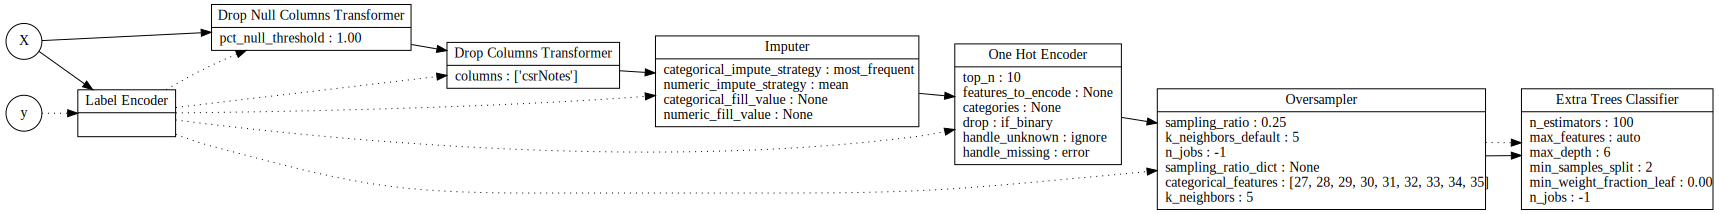

In [18]:
best_pipeline.graph()